In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle
from env import get_db_url

from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 


In [2]:
df = wrangle.wrangle_zillow()

In [3]:
col_list = ['bed_rms', 'bath_rms', 'sq_ft', 'tax_value', 'yr_blt', 'taxamount', 'fips']

In [4]:
df = wrangle.remove_stat_outliers(df, 3, col_list)

In [5]:
train, validate, test = wrangle.split_data (df)

In [6]:
train.shape

(1144752, 7)

In [7]:
train_half = df.sample(frac = 0.5)

In [8]:
train_half.shape

(1022100, 7)

## ready to begin working using train_half dataframe

# 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [9]:
baseline = train_half.tax_value.mean()
baseline

373715.53505919187

In [10]:
train_half['baseline'] = train_half.tax_value.mean()

In [11]:
lm=LinearRegression()

lm.fit(train_half[['sq_ft']], train_half.tax_value)

train_half['predictions'] = lm.predict(train_half[['sq_ft']])

train_half

,bed_rms,bath_rms,sq_ft,tax_value,yr_blt,taxamount,fips,baseline,predictions
791772,3.0,3.0,1984.0,90865.0,1952.0,1352.30,6037.0,373715.535059,419646.708033
1515783,3.0,1.5,1264.0,270051.0,1959.0,3547.28,6059.0,373715.535059,275198.991139
1685665,3.0,2.0,1388.0,86878.0,1952.0,1288.84,6037.0,373715.535059,300076.097937
859992,4.0,2.0,1419.0,451444.0,1962.0,8290.34,6059.0,373715.535059,306295.374637
1589232,3.0,1.0,1376.0,441633.0,1941.0,4535.74,6037.0,373715.535059,297668.635989
...,...,...,...,...,...,...,...,...,...
1133137,3.0,2.0,1761.0,95378.0,1989.0,1853.44,6037.0,373715.535059,374908.040161
1396086,3.0,2.0,1405.0,53796.0,1957.0,981.63,6037.0,373715.535059,303486.669030
676312,4.0,3.0,2013.0,518145.0,1963.0,6059.70,6059.0,373715.535059,425464.741074
485523,4.0,3.0,2548.0,502794.0,1989.0,6139.53,6037.0,373715.535059,532797.419600


In [12]:
train_half.sq_ft.shape

(1022100,)

In [13]:
train_half.tax_value.shape

(1022100,)

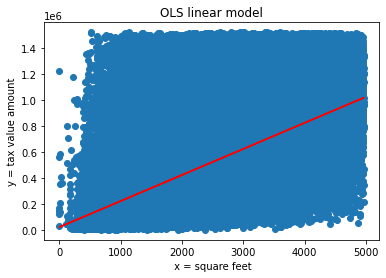

In [14]:
#scatter plot of actual data
plt.scatter(train_half.sq_ft, train_half.tax_value)
# line plot of regression line
plt.plot(train_half.sq_ft, train_half.predictions, color='red')
#specifications of chart
plt.xlabel(' x = square feet')
plt.ylabel('y = tax value amount')
plt.title('OLS linear model')

plt.show()

# 3. Plot residuals for the linear regressision

In [15]:
# residuals = actual - predicted
train_half['baseline_residual'] = train_half.tax_value - train_half.baseline
train_half['residual'] = train_half.tax_value - train_half.predictions

In [16]:
train_half

,bed_rms,bath_rms,sq_ft,tax_value,yr_blt,taxamount,fips,baseline,predictions,baseline_residual,residual
791772,3.0,3.0,1984.0,90865.0,1952.0,1352.30,6037.0,373715.535059,419646.708033,-282850.535059,-328781.708033
1515783,3.0,1.5,1264.0,270051.0,1959.0,3547.28,6059.0,373715.535059,275198.991139,-103664.535059,-5147.991139
1685665,3.0,2.0,1388.0,86878.0,1952.0,1288.84,6037.0,373715.535059,300076.097937,-286837.535059,-213198.097937
859992,4.0,2.0,1419.0,451444.0,1962.0,8290.34,6059.0,373715.535059,306295.374637,77728.464941,145148.625363
1589232,3.0,1.0,1376.0,441633.0,1941.0,4535.74,6037.0,373715.535059,297668.635989,67917.464941,143964.364011
...,...,...,...,...,...,...,...,...,...,...,...
1133137,3.0,2.0,1761.0,95378.0,1989.0,1853.44,6037.0,373715.535059,374908.040161,-278337.535059,-279530.040161
1396086,3.0,2.0,1405.0,53796.0,1957.0,981.63,6037.0,373715.535059,303486.669030,-319919.535059,-249690.669030
676312,4.0,3.0,2013.0,518145.0,1963.0,6059.70,6059.0,373715.535059,425464.741074,144429.464941,92680.258926
485523,4.0,3.0,2548.0,502794.0,1989.0,6139.53,6037.0,373715.535059,532797.419600,129078.464941,-30003.419600


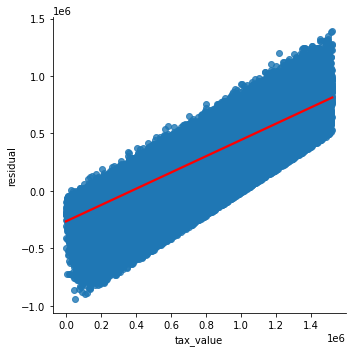

In [21]:
sns.lmplot(data=train_half, x = 'tax_value', y = 'residual', line_kws={'color':'red'})

<AxesSubplot:xlabel='tax_value', ylabel='residual'>

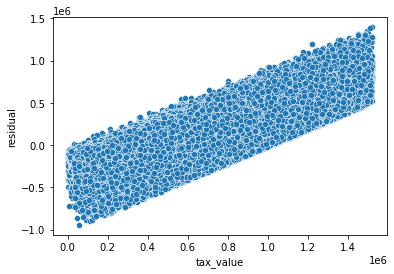

In [19]:
sns.scatterplot(data=train_half, x = 'tax_value', y = 'residual')

# 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

### SSE

In [23]:
# setting the squares
train_half['residual_squared'] = train_half.residual**2

In [46]:
# summing the squares
SSE = train_half.residual_squared.sum()
SSE

5.007993840769939e+16

In [30]:
# compare
print('SSE =', "{:.1f}".format(SSE))

SSE Baseline = 70656862349491832.0
SSE = 50079938407699392.0


### Explained sum of squares

In [39]:
ESS = sum((train_half.predictions - train_half.tax_value.mean())**2)
ESS

2.0576923941804596e+16

### Total Sum of Squares

In [47]:
TSS = SSE + ESS
TSS

7.065686234950398e+16

### MSE

In [48]:
# calculate MSE
MSE = SSE/len(train_half)
MSE

48997102443.693756

### RMSE

In [49]:
#calculate RMSE
RMSE = MSE**.5
RMSE

221352.8912024728

# 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).



### SSE Baseline

In [43]:
train_half['baseline_residual_squared'] = train_half.baseline_residual**2
SSE_baseline = train_half.baseline_residual_squared.sum()
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE Baseline = 70656862349491832.0


### MSE Baseline

In [44]:
MSE_baseline = SSE_baseline/len(train_half)
print(f"MSE baseline = {MSE_baseline:.1f}")

MSE baseline = 69129109039.7


### RMSE Baseline

In [45]:
RMSE_baseline = MSE_baseline**.5
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE baseline =  262924.2


# 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.



In [52]:
if SSE < SSE_baseline:
    print("what a super model you've made! Get you some cheese!")
else:
    print('model is poop, you can do better')

what a super model you've made! Get you some cheese!


# 7. What is the amount of variance explained in your model?



In [53]:
R2= ESS/TSS
print('R-squared = ',round(R2,3))
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")


R-squared =  0.291
Percent of variance in y explained by x =  29.1 %


# 8. Is my model better than the baseline model?

yes. My model says I deserve cheese. 

# 9. function building

In [69]:
def plot_residuals(y, yhat):
    
    residuals = y - yhat
  
    sns.scatterplot(x=y, y= yhat)
    plt.title('Plot of Residuals vs. Target Variable')
    plt.show()

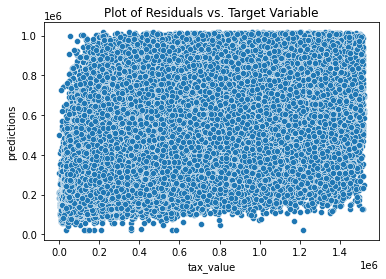

In [70]:
plot_residuals (train_half.tax_value, train_half.predictions)

In [75]:
def regression_errors(y, yhat):
    '''
    Takes in y and yhat and returns sum of squared errors (SSE) 
    explained sum of squares (ESS), total sum of squares (TSS) 
    mean squared error (MSE), and root mean squared error (RMSE)
    '''

    MSE = metric.mean_squared_error(y, yhat)
    SSE = MSE*len(y)
    ESS = sum((yhat - y.mean())**2)
    TSS = ESS + SSE
    RMSE = sqrt(MSE)
    
    return print("Values are:  MSE, SSE, ESS, TSS, RMSE")
    

In [72]:
SSE

5.007993840769939e+16